In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cluster_mpg.csv')

In [3]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df_dummy = pd.get_dummies(df.drop('name', axis=1))

In [7]:
df_dummy.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [11]:
scaled_df = scaler.fit_transform(df_dummy)

In [13]:
scaled_df = pd.DataFrame(data = scaled_df, columns=df_dummy.columns)

In [15]:
scaled_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0


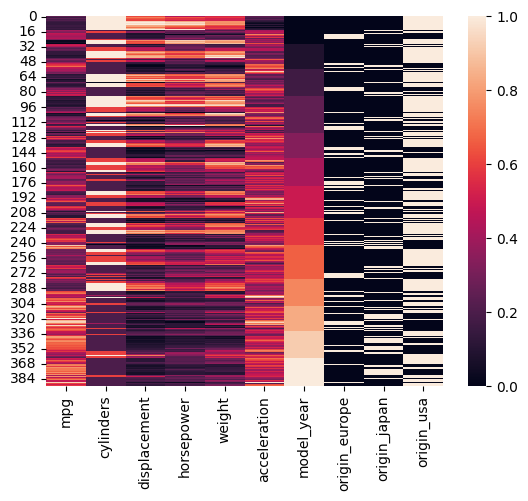

In [18]:
sns.heatmap(scaled_df);

In [19]:
len(scaled_df)

392

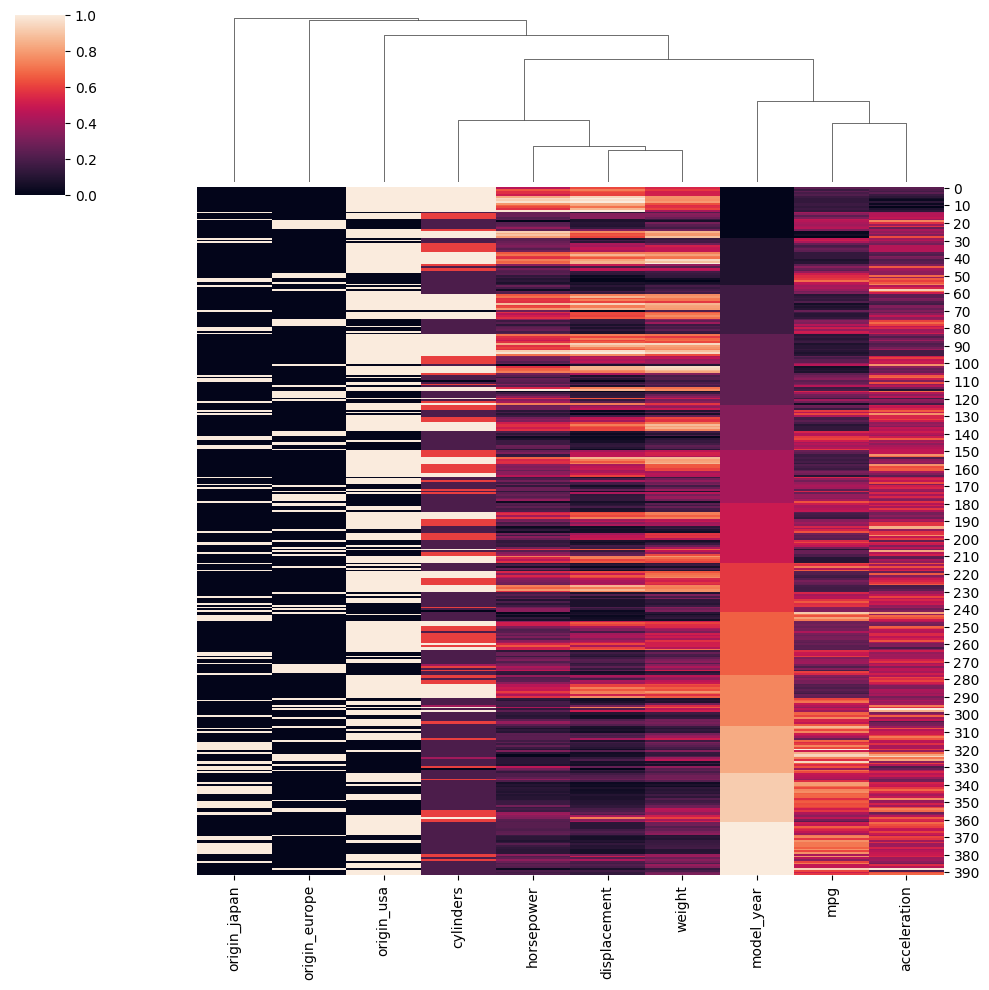

In [22]:
sns.clustermap(scaled_df, row_cluster=False);

<Axes: >

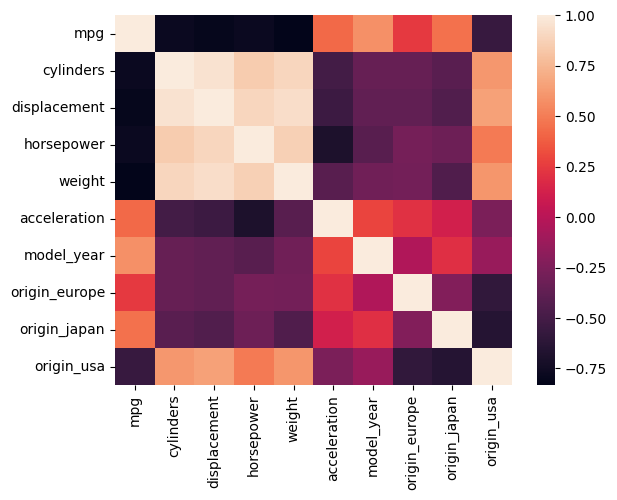

In [23]:
sns.heatmap(scaled_df.corr());

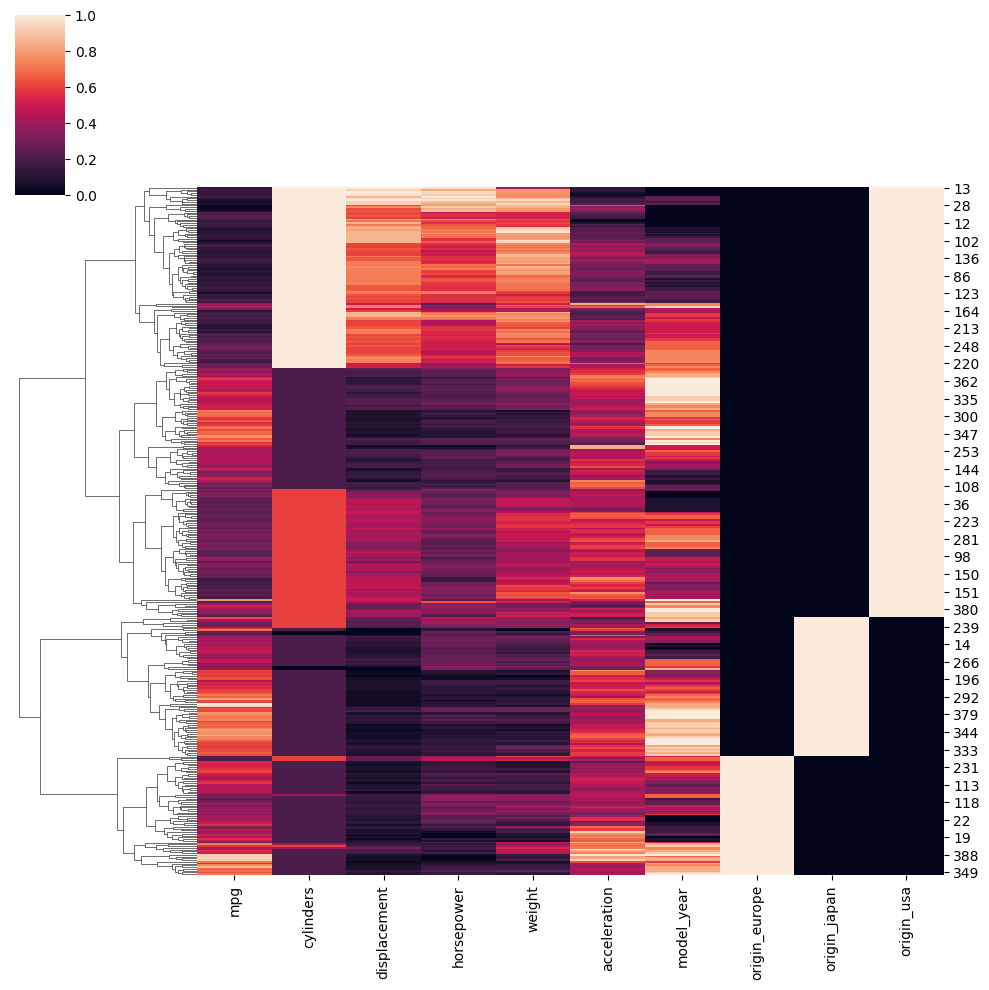

In [24]:
sns.clustermap(scaled_df, col_cluster=False);

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
model = AgglomerativeClustering(n_clusters=4)

In [28]:
labels = model.fit_predict(scaled_df)

In [29]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

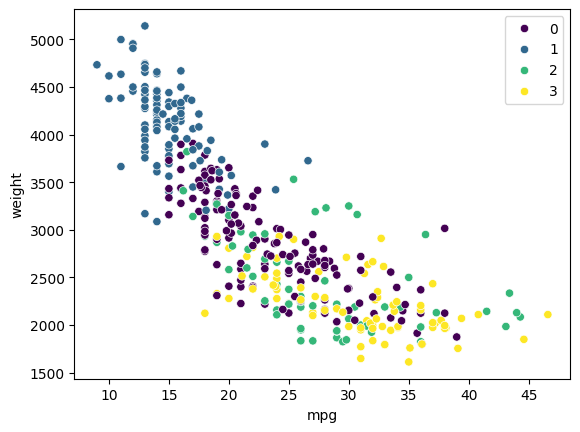

In [33]:
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue = labels, palette= 'viridis');

In [35]:
model1 =AgglomerativeClustering(n_clusters= None, distance_threshold=0) 

In [48]:
lables1 = model1.fit_predict(scaled_df)

In [39]:

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [50]:
linkage_matrix = hierarchy.linkage(model1.children_)

In [51]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]],
      shape=(390, 4))

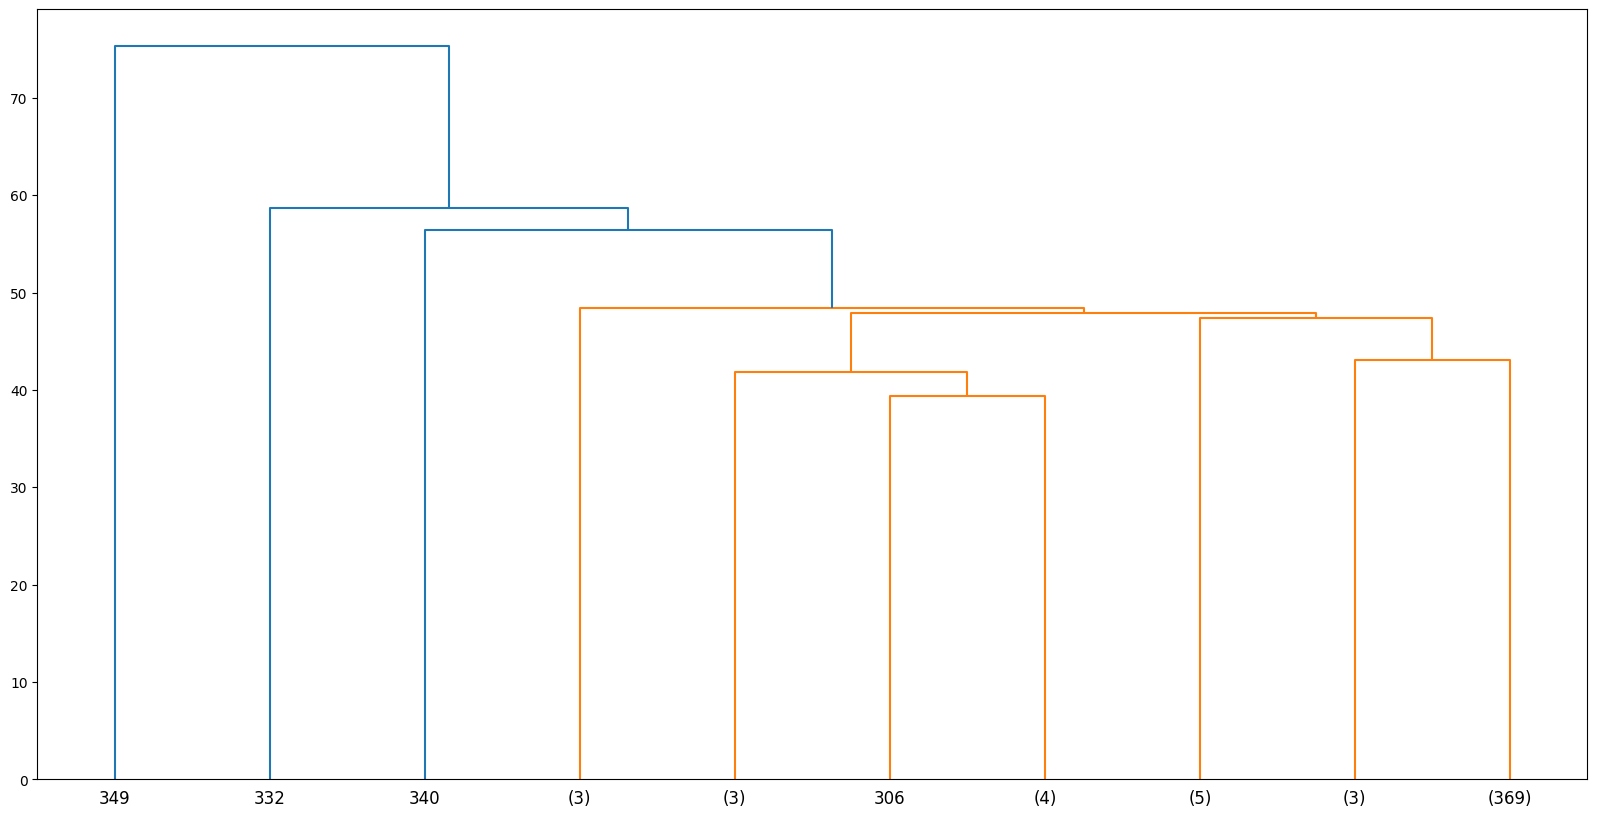

In [52]:
plt.figure(figsize=(20, 10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'lastp', p=10);

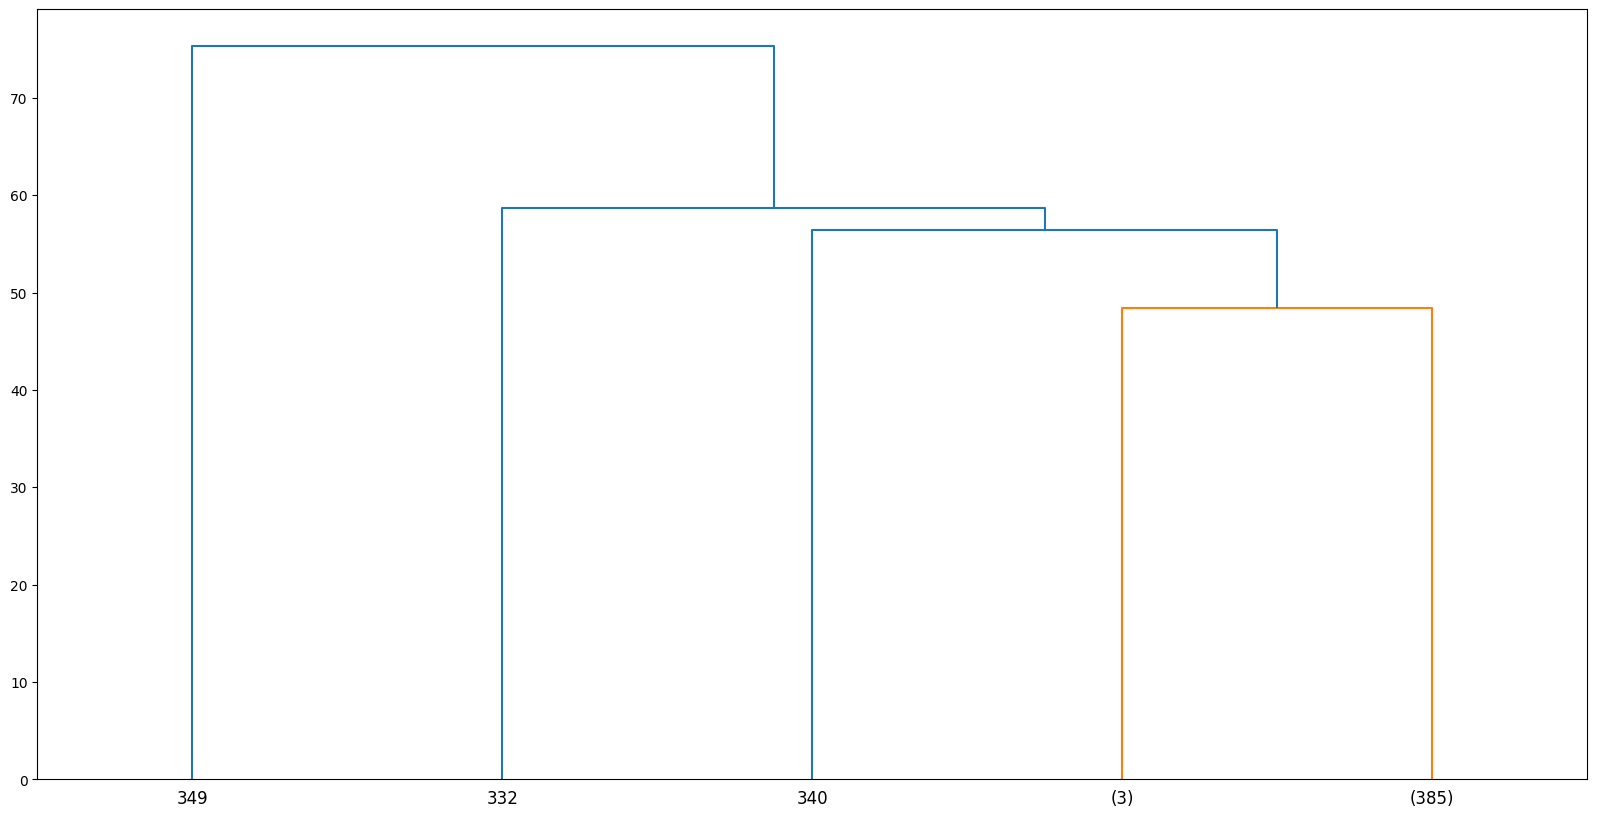

In [53]:
plt.figure(figsize=(20, 10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'level', p=3);

In [54]:
scaled_df['mpg'].idxmax()

320

In [55]:
scaled_df['mpg'].idxmin()

28

In [56]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [57]:
distance = np.linalg.norm(car_a - car_b)

In [58]:
distance

np.float64(2.3852929970374714)

In [59]:
np.sqrt(len(scaled_df.columns))

np.float64(3.1622776601683795)